In [1]:
class KalmanFilter(object):

    def __init__(self, process_variance, estimated_measurement_variance):
        self.process_variance = process_variance
        self.estimated_measurement_variance = estimated_measurement_variance
        self.posteri_estimate = 0.0
        self.posteri_error_estimate = 1.0

    def input_latest_noisy_measurement(self, measurement):
        priori_estimate = self.posteri_estimate
        priori_error_estimate = self.posteri_error_estimate + self.process_variance

        blending_factor = priori_error_estimate / (priori_error_estimate + self.estimated_measurement_variance)
        self.posteri_estimate = priori_estimate + blending_factor * (measurement - priori_estimate)
        self.posteri_error_estimate = (1 - blending_factor) * priori_error_estimate

    def get_latest_estimated_measurement(self):
        return self.posteri_estimate

In [2]:
import random
iteration_count = 500

actual_values = [-0.37727 + j * j * 0.00001 for j in range(iteration_count)]
noisy_measurement = [random.random() * 2.0 - 1.0 + actual_val for actual_val in actual_values]

# in practice we would take our sensor, log some readings and get the
# standard deviation
import numpy
measurement_standard_deviation = numpy.std([random.random() * 2.0 - 1.0 for j in range(iteration_count)])


process_variance = 1e-3
estimated_measurement_variance = measurement_standard_deviation ** 2  # 0.05 ** 2
kalman_filter = KalmanFilter(process_variance, estimated_measurement_variance)
posteri_estimate_graph = []

for iteration in range(1, iteration_count):
    kalman_filter.input_latest_noisy_measurement(noisy_measurement[iteration])
    posteri_estimate_graph.append(kalman_filter.get_latest_estimated_measurement())

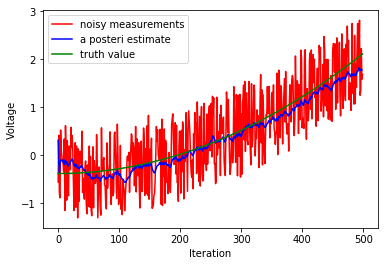

In [4]:
import pylab
pylab.figure()
pylab.plot(noisy_measurement, color='r', label='noisy measurements')
pylab.plot(posteri_estimate_graph, 'b-', label='a posteri estimate')
pylab.plot(actual_values, color='g', label='truth value')
pylab.legend()
pylab.xlabel('Iteration')
pylab.ylabel('Voltage')
pylab.show()